# Introducción al Aprendizaje por Refuerzos II
## Nicolás Salusso - 10710

### 1.1 - Se modifica la implementación de SARSA para que el agente aprenda la política óptima empleando *Q-Learning* manteniendo la política (e-greedy).

#### Definición del modelo

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

#### Función de iteración en un episodio

In [2]:
def oneEpisode():
    
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState
    
    # Función que selecciona la acción basada en epsilon-greedy
    def accion_por_politica():
        if np.random.binomial(1, EPSILON) == 1:
            accion = np.random.choice(actions)
        else:
            accion = np.argmax(stateActionValues[currentState[0], currentState[1], :])
        return accion
        

    # selección de acción basada en epsilon-greedy
    currentAction = accion_por_politica()

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        
        max_action = np.argmax(stateActionValues[newState[0], newState[1], :])
        
        stateActionValues[currentState[0], currentState[1], currentAction] += \
            ALPHA * (REWARD + stateActionValues[newState[0], newState[1], max_action] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        
        currentState = newState
        currentAction = accion_por_politica()
        
        time += 1
    return time

#### Ejecución de los 500 episodios y obtencion de política óptima y gráfica.

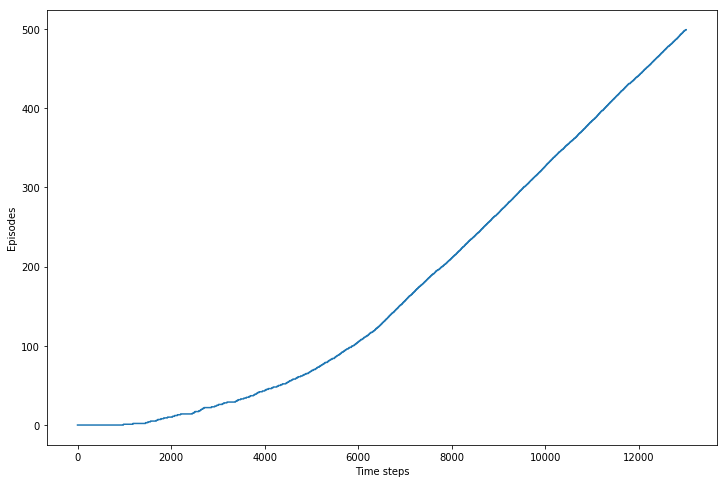

['R', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'U', 'D', 'L', 'L']
['D', 'R', 'D', 'L', 'R', 'U', 'U', 'U', 'L', 'L']
['R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'L', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [3]:
# Cantidad de episodios
episodeLimit = 500
ep = 0
episodes_q_learning = []
time = 0
time_acum = 0
grafica_q_learning = []
while ep < episodeLimit:
    time = oneEpisode()
    episodes_q_learning.extend([ep] * time)
    time_acum += time
    grafica_q_learning.append(time_acum/(ep + 1))
    ep += 1

plt.figure(figsize=(12, 8))
plt.plot(episodes_q_learning)
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

# Selección Greedy sobre la política...
optimalPolicyQLearning = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicyQLearning.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicyQLearning[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicyQLearning[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicyQLearning[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicyQLearning[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicyQLearning[-1].append('R')
for row in optimalPolicyQLearning:
    print(row)
print([str(w) for w in WIND])

### 1.2 - Modificación de la implementación anterior para que el agente aprenda la política óptima empleando *SARSA($\lambda$)* manteniendo la política (e-greedy).

#### Definición del modelo

In [4]:
from __future__ import print_function
import numpy as np
# from python_utils.import_ import import_global
import matplotlib.pyplot as plt


# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# LAMBDA
LAMBDA = 0.8

# Traza
e = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))

#### Función de iteración en un episodio

In [5]:
# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState

    # selección de acción basade en epsilon-greedy
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
            
        # Sarsa(lambda) update
        
        # Se define delta
        delta = (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        
        # Se actualiza la traza en el estado que se paso.
        e[currentState[0], currentState[1], currentAction] += 1
        
        for i in range(0, WORLD_HEIGHT):
            for j in range(0, WORLD_WIDTH):
                for action in actions:
                    stateActionValues[i, j, action] += ALPHA * delta * e[i, j, action]
                    e[i, j, action] = LAMBDA * e[i, j, action]

        currentState = newState
        currentAction = newAction
        time += 1
    return time

#### Ejecución de los 500 episodios y obtencion de política óptima y gráfica.

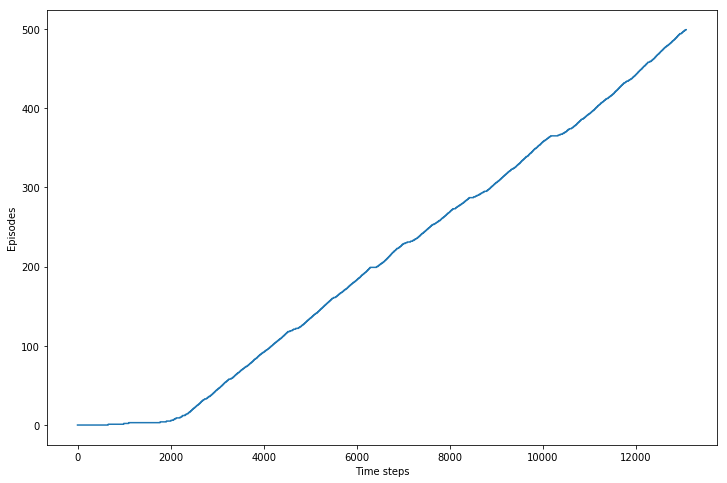

['D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['D', 'R', 'R', 'R', 'R', 'R', 'U', 'D', 'U', 'D']
['D', 'R', 'R', 'R', 'R', 'U', 'D', 'U', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'D', 'D', 'G', 'R', 'D']
['U', 'D', 'U', 'L', 'R', 'R', 'U', 'R', 'L', 'L']
['R', 'R', 'R', 'R', 'R', 'U', 'U', 'R', 'R', 'U']
['R', 'R', 'U', 'D', 'U', 'U', 'U', 'U', 'R', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [6]:
# Cantidad de episodios

episodeLimit = 500
ep = 0
episodes_graf_sarsa_lambda = []
time = 0
time_acum = 0
grafica_sarsa_lambda = []
while ep < episodeLimit:
    time = oneEpisode()
    episodes_graf_sarsa_lambda.extend([ep] * time)
    time_acum += time
    grafica_sarsa_lambda.append(time_acum/(ep + 1))
    ep += 1

plt.figure(figsize=(12, 8))
plt.plot(episodes_graf_sarsa_lambda)
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

# Selección Greedy sobre la política...
optimalPolicySarsaLambda = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicySarsaLambda.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicySarsaLambda[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicySarsaLambda[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicySarsaLambda[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicySarsaLambda[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicySarsaLambda[-1].append('R')
for row in optimalPolicySarsaLambda:
    print(row)
print([str(w) for w in WIND])

### 1.3 - Comparación de convergecia en *SARSA*, *Q-Learning* y *SARSA(lambda)*

#### *SARSA*

In [7]:
from __future__ import print_function
import numpy as np
# from python_utils.import_ import import_global
import matplotlib.pyplot as plt


# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# interacción en un episodio
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState

    # selección de acción basade en epsilon-greedy
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        # Sarsa update
        stateActionValues[currentState[0], currentState[1], currentAction] += \
            ALPHA * (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        currentState = newState
        currentAction = newAction
        time += 1
        
    return time

# Cantidad de episodios

episodeLimit = 500
ep = 0
episodes_graf_sarsa = []
time = 0
time_acum = 0
grafica_sarsa = []
while ep < episodeLimit:
    time = oneEpisode()
    episodes_graf_sarsa.extend([ep] * time)
    time_acum += time
    grafica_sarsa.append(time_acum/(ep + 1))
    ep += 1

optimalPolicySarsa = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicySarsa.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicySarsa[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicySarsa[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicySarsa[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicySarsa[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicySarsa[-1].append('R')

#### Gráfica de la convergencia

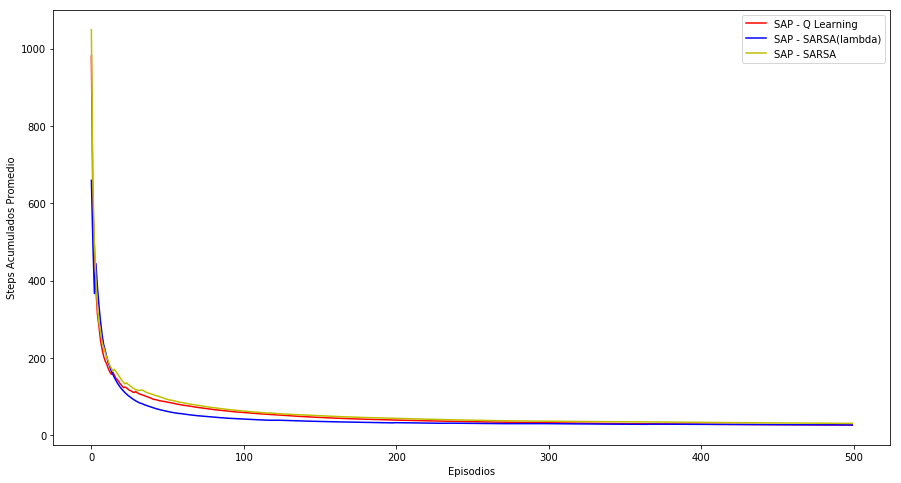

SAP = Steps Acumulados Promedio


In [8]:
plt.figure(figsize=(15, 8))
q_learning = plt.plot(grafica_q_learning, 'r-', label='SAP - Q Learning')
sarsa_lambda = plt.plot(grafica_sarsa_lambda, 'b-', label='SAP - SARSA(lambda)')
sarsa = plt.plot(grafica_sarsa, 'y-', label='SAP - SARSA')
plt.legend()
plt.xlabel('Episodios')
plt.ylabel('Steps Acumulados Promedio')
plt.show()

print('SAP = Steps Acumulados Promedio')

### 1.4 Políticas aprendidas para cada caso

In [9]:
print('Política óptima Q Learning')
for row in optimalPolicyQLearning:
    print(row)
print([str(w) for w in WIND])
print('')
print('Política óptima SARSA(lambda)')
for row in optimalPolicySarsaLambda:
    print(row)
print([str(w) for w in WIND])
print('')
print('Política óptima SARSA')
for row in optimalPolicySarsa:
    print(row)
print([str(w) for w in WIND])

Política óptima Q Learning
['R', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'U', 'D', 'L', 'L']
['D', 'R', 'D', 'L', 'R', 'U', 'U', 'U', 'L', 'L']
['R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'L', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']

Política óptima SARSA(lambda)
['D', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['D', 'R', 'R', 'R', 'R', 'R', 'U', 'D', 'U', 'D']
['D', 'R', 'R', 'R', 'R', 'U', 'D', 'U', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'D', 'D', 'G', 'R', 'D']
['U', 'D', 'U', 'L', 'R', 'R', 'U', 'R', 'L', 'L']
['R', 'R', 'R', 'R', 'R', 'U', 'U', 'R', 'R', 'U']
['R', 'R', 'U', 'D', 'U', 'U', 'U', 'U', 'R', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']

Política óptima SARSA
['U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['L', 'R', 'R', 'R', 'R', 'L', 'R', 'R', 'U', 'D']
[

### 1.5 Modificación de la implementación en *1.2* empleando King's Moves

#### Definición del modelo.

In [10]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt


# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTION_UP_RIGHT = 4
ACTION_UP_LEFT = 5
ACTION_DOWN_RIGHT = 6
ACTION_DOWN_LEFT = 7

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 8))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT,
           ACTION_UP_RIGHT, ACTION_UP_LEFT, ACTION_DOWN_RIGHT, ACTION_DOWN_LEFT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        destination[ACTION_UP_RIGHT] = [max(i - 1 - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        destination[ACTION_UP_LEFT] = [max(i - 1 - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_DOWN_RIGHT] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), 
                                          min(j + 1, WORLD_WIDTH - 1)]
        destination[ACTION_DOWN_LEFT] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), 
                                         max(j - 1, 0)]
        actionDestination[-1].append(destination)

# LAMBDA
LAMBDA = 0.8

# Traza
e = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 8))

#### Función de iteración en un episodio.

In [11]:
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState

    # selección de acción basade en epsilon-greedy
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
            
        # Sarsa(lambda) update
        
        # Se define delta
        delta = (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        
        # Se actualiza la traza en el estado que se paso.
        e[currentState[0], currentState[1], currentAction] += 1
        
        for i in range(0, WORLD_HEIGHT):
            for j in range(0, WORLD_WIDTH):
                for action in actions:
                    stateActionValues[i, j, action] += ALPHA * delta * e[i, j, action]
                    e[i, j, action] = LAMBDA * e[i, j, action]
        currentState = newState
        currentAction = newAction
        time += 1
    return time

#### Ejecución de los 500 episodios y obtencion de política óptima y gráfica.

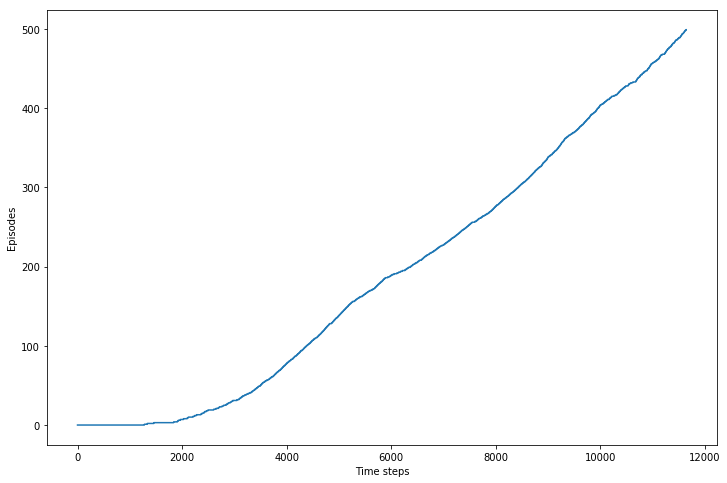

['UR', 'UR', ' R ', ' R ', ' R ', ' R ', ' R ', ' R ', 'UR', ' D ']
['UL', 'DR', ' U ', 'DR', 'UR', 'UL', ' D ', ' U ', 'UR', 'DR']
['DR', 'UR', 'UR', 'DL', ' U ', ' R ', 'DR', ' U ', 'DR', ' D ']
[' R ', ' D ', 'DL', 'UR', ' R ', ' R ', 'DR', ' G ', 'DL', 'DR']
[' R ', 'DR', ' L ', ' R ', 'UL', 'DR', 'DR', 'DR', ' L ', 'UL']
['UR', 'DL', ' D ', ' R ', ' R ', 'DR', ' R ', ' L ', 'UL', 'UR']
[' R ', 'DR', ' R ', 'DR', ' R ', 'DL', ' D ', ' L ', ' R ', ' U ']
[' 0 ', ' 0 ', ' 0 ', ' 1 ', ' 1 ', ' 1 ', ' 2 ', ' 2 ', ' 1 ', ' 0 ']


In [12]:
# Cantidad de episodios
episodeLimit = 500
ep = 0
episodes = []
while ep < episodeLimit:
    time = oneEpisode()
    episodes.extend([ep] * time)
    ep += 1

plt.figure(figsize=(12, 8))
plt.plot(episodes)
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

# Selección Greedy sobre la política...
optimalPolicySarsaLambda = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicySarsaLambda.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicySarsaLambda[-1].append(' G ')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicySarsaLambda[-1].append(' U ')
        elif bestAction == ACTION_DOWN:
            optimalPolicySarsaLambda[-1].append(' D ')
        elif bestAction == ACTION_LEFT:
            optimalPolicySarsaLambda[-1].append(' L ')
        elif bestAction == ACTION_RIGHT:
            optimalPolicySarsaLambda[-1].append(' R ')
        elif bestAction == ACTION_UP_RIGHT:
            optimalPolicySarsaLambda[-1].append('UR')
        elif bestAction == ACTION_UP_LEFT:
            optimalPolicySarsaLambda[-1].append('UL')
        elif bestAction == ACTION_DOWN_RIGHT:
            optimalPolicySarsaLambda[-1].append('DR')
        elif bestAction == ACTION_DOWN_LEFT:
            optimalPolicySarsaLambda[-1].append('DL')
for row in optimalPolicySarsaLambda:
    print(row)
print([' ' + str(w) + ' ' for w in WIND])

### 1.6 - Modificación de la implementación del ejercicio *1.2* asumiendo que la fuerza del viento varía de manera equiprobable entre el valor A establecido originalmente y A+1, A-1, el cual se determina para cada transición efectuada.

#### Definición del modelo

In [13]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import random

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        if WIND[j] != 0:
            wind = random.randint(WIND[j] - 1, WIND[j] + 1)
            destination[ACTION_UP] = [max(i - 1 - wind, 0), j]
            destination[ACTION_DOWN] = [max(min(i + 1 - wind, WORLD_HEIGHT - 1), 0), j]
            destination[ACTION_LEFT] = [max(i - wind, 0), max(j - 1, 0)]
            destination[ACTION_RIGHT] = [max(i - wind, 0), min(j + 1, WORLD_WIDTH - 1)]
            actionDestination[-1].append(destination)
        else:
            destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
            destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
            destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
            destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
            actionDestination[-1].append(destination)
            
        

# LAMBDA
LAMBDA = 0.8

# Traza
e = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))

#### Función de iteración en un episodio

In [14]:
def oneEpisode():
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState

    # selección de acción basade en epsilon-greedy
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
            
        # Sarsa(lambda) update
        
        # Se define delta
        delta = (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        
        # Se actualiza la traza en el estado que se paso.
        e[currentState[0], currentState[1], currentAction] += 1
        
        for i in range(0, WORLD_HEIGHT):
            for j in range(0, WORLD_WIDTH):
                for action in actions:
                    stateActionValues[i, j, action] += ALPHA * delta * e[i, j, action]
                    e[i, j, action] = LAMBDA * e[i, j, action]

        currentState = newState
        currentAction = newAction
        time += 1
    return time

#### Ejecución de los 500 episodios y obtencion de política óptima y gráfica.

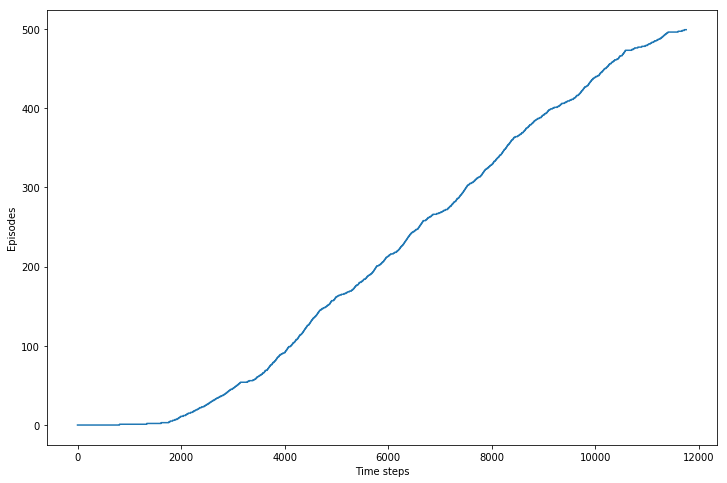

['L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['D', 'U', 'L', 'U', 'L', 'U', 'R', 'D', 'U', 'D']
['R', 'R', 'L', 'D', 'R', 'R', 'L', 'L', 'D', 'D']
['U', 'L', 'L', 'U', 'R', 'U', 'U', 'G', 'U', 'D']
['D', 'D', 'U', 'L', 'D', 'D', 'R', 'R', 'R', 'D']
['U', 'D', 'L', 'D', 'R', 'R', 'D', 'D', 'L', 'L']
['R', 'L', 'L', 'D', 'U', 'D', 'U', 'U', 'R', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [15]:
# Cantidad de episodios
episodeLimit = 500
ep = 0
episodes = []
while ep < episodeLimit:
    time = oneEpisode()
    episodes.extend([ep] * time)
    ep += 1

plt.figure(figsize=(12, 8))
plt.plot(episodes)
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.show()

# Selección Greedy sobre la política...
optimalPolicySarsaLambda = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicySarsaLambda.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicySarsaLambda[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicySarsaLambda[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicySarsaLambda[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicySarsaLambda[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicySarsaLambda[-1].append('R')
for row in optimalPolicySarsaLambda:
    print(row)
print([str(w) for w in WIND])

### 1.7 - Análisis de la convergencia de Sarsa($\lambda$) en *1.6* para 4 valores distintos de $\lambda$.

#### Definición del modelo

In [16]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import random

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        if WIND[j] != 0:
            wind = random.randint(WIND[j] - 1, WIND[j] + 1)
            destination[ACTION_UP] = [max(i - 1 - wind, 0), j]
            destination[ACTION_DOWN] = [max(min(i + 1 - wind, WORLD_HEIGHT - 1), 0), j]
            destination[ACTION_LEFT] = [max(i - wind, 0), max(j - 1, 0)]
            destination[ACTION_RIGHT] = [max(i - wind, 0), min(j + 1, WORLD_WIDTH - 1)]
            actionDestination[-1].append(destination)
        else:
            destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
            destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
            destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
            destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
            actionDestination[-1].append(destination)
            
        

# valores para lambda
lambdas = np.linspace(0.2, 0.9, 4)
print('Valores de lambda: \n{}'.format(lambdas))
# Traza
e = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))

Valores de lambda: 
[ 0.2         0.43333333  0.66666667  0.9       ]


#### Función de iteración en un episodio

In [17]:
# interacción en un episodio
def oneEpisode(l):
    
    # se setea el valor de LAMBDA
    LAMBDA = l
    
    # acumulador de steps en el episodio
    time = 0

    # estado inicial
    currentState = startState

    # selección de acción basade en epsilon-greedy
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
            
        # Sarsa(lambda) update
        
        # Se define delta
        delta = (REWARD + stateActionValues[newState[0], newState[1], newAction] -
            stateActionValues[currentState[0], currentState[1], currentAction])
        
        # Se actualiza la traza en el estado que se paso.
        e[currentState[0], currentState[1], currentAction] += 1
        
        for i in range(0, WORLD_HEIGHT):
            for j in range(0, WORLD_WIDTH):
                for action in actions:
                    stateActionValues[i, j, action] += ALPHA * delta * e[i, j, action]
                    e[i, j, action] = LAMBDA * e[i, j, action]

        currentState = newState
        currentAction = newAction
        time += 1
    return time

#### Ejecución de los 500 episodios, obtención de política óptima y gráfica para cada uno de los valores de $\lambda$ definidos anteriormente.

Con LAMBDA=0.2


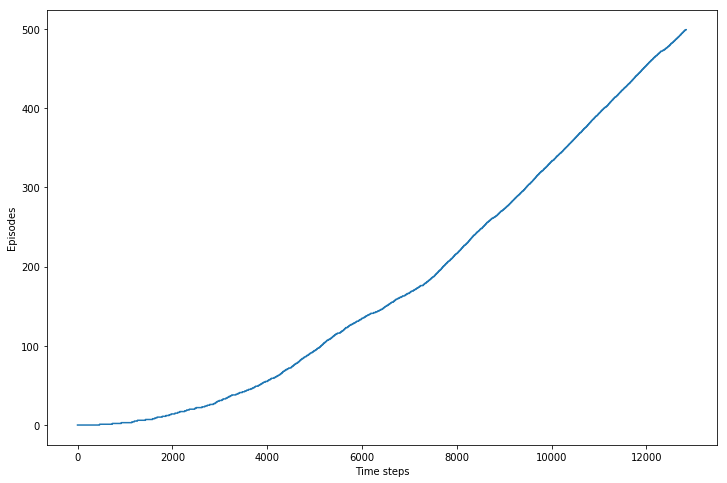

['U', 'U', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']


['R', 'R', 'U', 'R', 'R', 'R', 'U', 'U', 'R', 'D']
['D', 'R', 'R', 'R', 'R', 'D', 'R', 'G', 'L', 'L']
['R', 'R', 'R', 'R', 'R', 'R', 'U', 'R', 'U', 'L']
['R', 'R', 'R', 'R', 'R', 'U', 'U', 'D', 'L', 'D']
['R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'R', 'D']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']
Con LAMBDA=0.43333333333333335


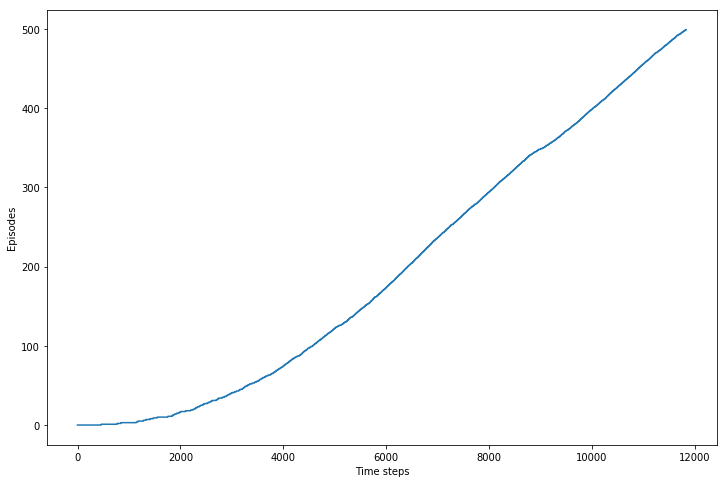

['L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['L', 'R', 'R', 'R', 'R', 'U', 'D', 'R', 'R', 'D']
['R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'D']
['R', 'D', 'D', 'R', 'U', 'R', 'D', 'G', 'L', 'L']
['R', 'R', 'R', 'R', 'D', 'R', 'U', 'R', 'R', 'L']
['R', 'D', 'R', 'R', 'R', 'U', 'U', 'L', 'L', 'L']
['R', 'R', 'R', 'R', 'U', 'U', 'U', 'U', 'L', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


Con LAMBDA=0.6666666666666666


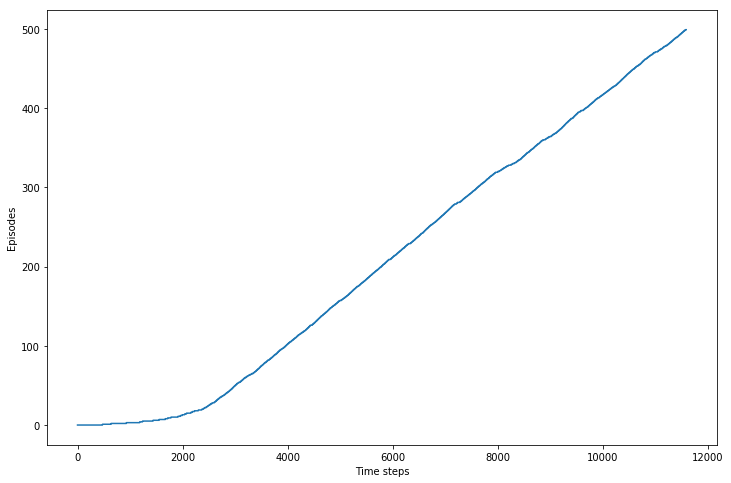

['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['R', 'R', 'R', 'U', 'R', 'D', 'U', 'U', 'D', 'D']
['R', 'R', 'U', 'R', 'D', 'U', 'R', 'L', 'R', 'D']
['R', 'R', 'R', 'U', 'R', 'U', 'R', 'G', 'L', 'L']
['D', 'L', 'D', 'D', 'U', 'U', 'U', 'R', 'D', 'L']
['R', 'R', 'R', 'U', 'D', 'U', 'U', 'R', 'U', 'U']
['R', 'D', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'D']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


Con LAMBDA=0.9


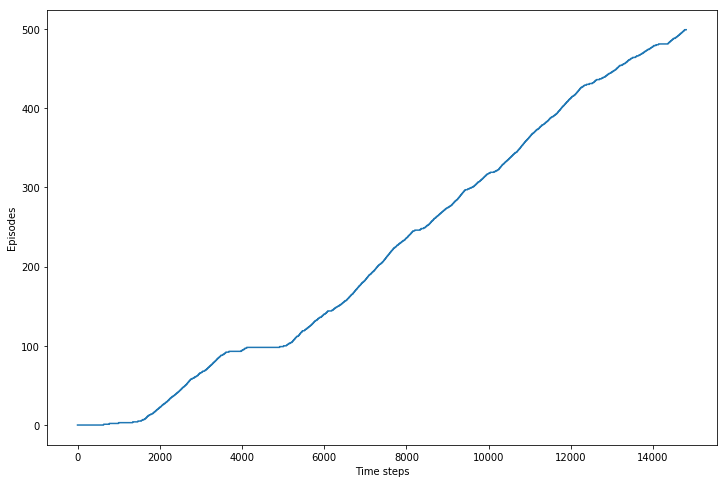

['L', 'D', 'D', 'R', 'R', 'R', 'R', 'R', 'R', 'D']
['D', 'L', 'D', 'R', 'R', 'D', 'L', 'D', 'D', 'D']
['R', 'R', 'D', 'L', 'U', 'L', 'R', 'L', 'L', 'D']
['L', 'U', 'R', 'R', 'R', 'U', 'L', 'G', 'L', 'L']
['D', 'R', 'D', 'L', 'U', 'R', 'U', 'L', 'D', 'L']
['D', 'D', 'U', 'R', 'U', 'U', 'U', 'D', 'U', 'U']
['R', 'R', 'U', 'R', 'U', 'U', 'U', 'U', 'R', 'D']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [18]:
grafica_sarsa_lambdas = []
for l in lambdas:
    # se setean las variables iniciales
    e = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
    stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
    
    grafica_sarsa_lambdas.append([])
    # Cantidad de episodios por lamda
    episodeLimit = 500
    ep = 0
    episodes_graf_sarsa_lambda = []
    time = 0
    time_acum = 0
    while ep < episodeLimit:
        time = oneEpisode(l)
        episodes_graf_sarsa_lambda.extend([ep] * time)
        time_acum += time
        grafica_sarsa_lambdas[-1].append(time_acum/(ep + 1))
        ep += 1
    
    print('Con LAMBDA={}'.format(l))
    plt.figure(figsize=(12, 8))
    plt.plot(episodes_graf_sarsa_lambda)
    plt.xlabel('Time steps')
    plt.ylabel('Episodes')
    plt.show()
    
    # Selección Greedy sobre la política...
    optimalPolicySarsaLambda = []
    for i in range(0, WORLD_HEIGHT):
        optimalPolicySarsaLambda.append([])
        for j in range(0, WORLD_WIDTH):
            if [i, j] == goalState:
                optimalPolicySarsaLambda[-1].append('G')
                continue
            bestAction = np.argmax(stateActionValues[i, j, :])
            if bestAction == ACTION_UP:
                optimalPolicySarsaLambda[-1].append('U')
            elif bestAction == ACTION_DOWN:
                optimalPolicySarsaLambda[-1].append('D')
            elif bestAction == ACTION_LEFT:
                optimalPolicySarsaLambda[-1].append('L')
            elif bestAction == ACTION_RIGHT:
                optimalPolicySarsaLambda[-1].append('R')
    for row in optimalPolicySarsaLambda:
        print(row)
    print([str(w) for w in WIND])

#### Gráfica de comparación para el análisis

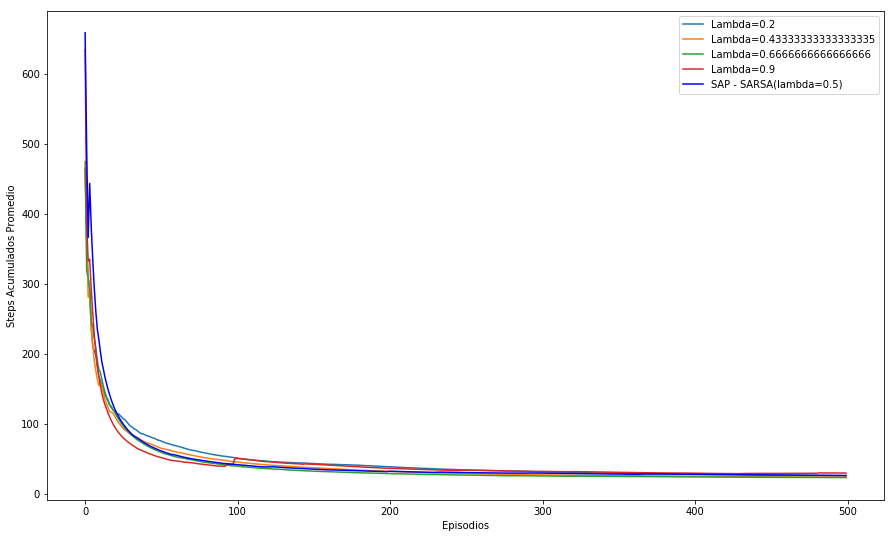

In [19]:
plt.figure(figsize=(15, 9))
indice = 0
for row in grafica_sarsa_lambdas:
    plt.plot(row, label='Lambda={}'.format(lambdas[indice]))
    indice += 1
# También se añade el anterior SARSA(lambda) para tener una referencia de comparación...
# para los otros gráficos.
plt.plot(grafica_sarsa_lambda, 'b-', label='SAP - SARSA(lambda=0.5)')
plt.legend()
plt.xlabel('Episodios')
plt.ylabel('Steps Acumulados Promedio')
plt.show()

FIN